# Workshop GeoUtrecht - Reverse Fault - 21.08.2020

**Authors: Alexander Jüstel (CGRE - RWTH Aachen University), Arthur Endlein Correira**

# Overview

`GemGIS` is a Python-based, **open-source geographic information processing library**. It is capable of preprocessing spatial data such as vector data (shape files, geojson files, geopackages), raster data, data obtained from WMS services or XML/KML files. Preprocessed data can be stored in a dedicated Data Class to be passed to the geomodeling package [GemPy](https://github.com/cgre-aachen/gempy) in order to accelerate to model building process. Postprocessing of model results will allow export from `GemPy` to geoinformation systems such as QGIS and ArcGIS or to Google Earth for further use. 

`GemGIS` uses the full functionality of [GeoPandas](https://geopandas.org/), [rasterio](https://rasterio.readthedocs.io/en/latest/#), [OWSLib](https://geopython.github.io/OWSLib/), [Pandas](https://pandas.pydata.org/) and [NumPy](https://numpy.org/).

All provided maps and examples were taken from the books 'Interpretation of Geological Structures Through Maps: An Introductory Practical Manual' by D. Powell and "An Introduction to Geological Structures and Maps" by G.M. Bennison referenced at the bottom. referenced at the bottom.

# Motivation

`GemGIS` was build upon the idea of Prof. Florian Wellmann (CGRE - RWTH Aachen University) to have a tighter integration of spatial data with `GemPy`. Larger models (Master Thesis Alexander Jüstel) made it necessary to think about workflows to simplify the procedures to get a larger number of data into `GemPy`. 

***What is the aim of GemGIS?***
- Accelerate processing of spatial data
- Enhance post-modeling functionalities
- Create a tool for teaching purposes
- Interactively creating GemPy Models

# Installation
Due to rasterio, GemGIS must be used with **python==3.7**

1) `conda install geopandas`

2) `conda install rasterio`

3) `pip install gemgis`


# Structure of Package

The core of `GemGIS` is made of the `GemPyData` class (`gemgis.py`). Its attributes can directly be utilized by `GemPy` making it easier for users to load data. Methods of the `GemPyData` class allow users to directly set these attributes. Multiple other files contain functions to manipulate vector data, raster data, etc.:

* `gemgis.py` - core file containing the `GemPyData` class
* `vector.py` - file containing functions to manipulate vector data
* `raster.py` - file containing functions to manipulate raster data
* `utils.py` - file containing utility functions frequently used for the manipulation of vector/raster data
* `wms.py` - file containing methods to load WMS services as arrays/rasters
* `visualization.py` - file containing functions to simplify plotting of spatial data
* `postprocessing.py` - file containing functions to postprocess GemPy geo_model data
* `notebooks` - folder containing tutorial notebooks explaining the features of `GemGIS` and example notebooks applying these features

# Features

<a name="vector"></a>
### Extracting Data from Vector Files

Data stored as points, lines or polygons as shape-files, geopackages or geojson files can easily be imported into `GemGIS` GeoPandas GeoDataFrames. X and Y coordinates can then be extracted for these objects for direct use in `GemPy`. Digital elevations models can be interpolated if contour lines with height values are provided. If the loaded the exceeds the desired modeling/working are extent, the data can be cropped. 

<a name="raster"></a>
### Extracting Data from Raster Files

Rasters (stored as arrays in Python) such as digital elevation models store height information. The height of interface points can be extracted from these rasters. In addition, if a raster represents a layer in the subsurface, orientation values can be sampled for the use in `GemPy`. Orientations are calculated via the slope and aspect of the provided raster. It is also possible to resize rasters, clip rasters or save rasters as referenced geotiffs again. 

<a name="wms"></a>
### Extracting Data from Online Services (in development)

Online services provide a wide range of possibilities to work with spatial data. Currently, it is possible to load data from WMS services into `GemGIS`. The functionality will be extended to WCS and WFS services in the future.

<a name="xml/kml"></a>
### Extracting Data from XML/KML Files (in development)
XML/KML Data export will be available in the future. 

<a name="pyvista"></a>
### Visualization of Data in PyVista
`PyVista` is the main 3D visualization package of `GemPy`. In order for new users to get used to the package, it is possible to plot the input data as a `PyVista` plot. 

<a name="utils"></a>
### Utility Tools
`GemGIS` offers a wide range of utility tools. These includes 
* Conversion of vector data into custom sections directly usable in `GemPy`
* Conversion of GeoDataFrames into Pandas DataFrames for `GemPy`
* Setting the extent and resolution for a `GemPy` model based on vector data and lists
* Load and save QGIS style files (QML) for the use as color_dict in `GemPy`
* Calculate orientations based on strike lines
* Interpolate missing strike lines to calculate orientations
* Read CSV files as GeoDataFrames
* and many more to come


<a name="post"></a>
### Postprocessing of GemPy geo_model data
`GemGIS` also offers postprocessing methods to use the data of the `GemPy` model. These include:
* Export of the geological map as shape file
* Extract boreholes from `GemPy` models
* Create depth maps of surfaces
* and many more to come

# Workshop GeoUtrecht

The image below shows an outcropping coal seam with layers above and below the coal seam as well as a fault striking roughly W-E. The area is 763 m wide (W-E extent) and 989 m high (N-S extent). The scale is neglected.

Tasks: 
- Create a `GemPy` Model to visualize the spatial distribution of the coal seam. 

- Determine the type of fault (normal, reverse, transform)

- Where would you recommend to drill (taking the type of fault into account)?


<img src="data/task.png" width="300">

# Data Audit

***What is available:***
- Contour Lines
- Layer Boundaries
- Fault Trace

***What is needed:***
- Interface points
- Orientation values

***How do we get the missing data?***
-> via strike lines

***What do we need to do now?***
- Digitize contour lines
- Digitize layer boundaries
- Create strike lines
- Create custom section

<img src="data/task.png" width="300">

# Importing Libraries

In [1]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\legui\miniconda3\envs\gu\Library\share'
import sys
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
import pyproj
pyproj.__version__

'2.6.0'

# Data Preaparation

## Load Basemap and Geological Map

In [3]:
base_map = rasterio.open('../../data/task.png')
geological_map = gpd.read_file('../../data/geolmap.geojson')

C:\Users\legui\miniconda3\envs\gu\lib\site-packages\rasterio\__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


## Digitize and Load Contour Data

In [4]:
topo = gpd.read_file('../../data/topo.geojson')
topo.head()

,id,Z,geometry
0,None,200,"MULTILINESTRING ((221.244 -2.685, 230.656 6.72..."
1,None,300,"MULTILINESTRING ((43.668 -2.057, 56.845 8.296,..."
2,None,400,"MULTILINESTRING ((0.843 170.812, 17.314 180.22..."
3,None,500,"MULTILINESTRING ((0.843 296.621, 23.118 311.68..."
4,None,600,"MULTILINESTRING ((1.941 429.332, 40.217 455.05..."


In [5]:
type(topo)

geopandas.geodataframe.GeoDataFrame

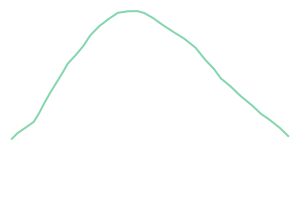

In [6]:
topo.loc[0]['geometry']

In [7]:
type(topo.loc[0]['geometry'])

shapely.geometry.multilinestring.MultiLineString

## Plot Topography

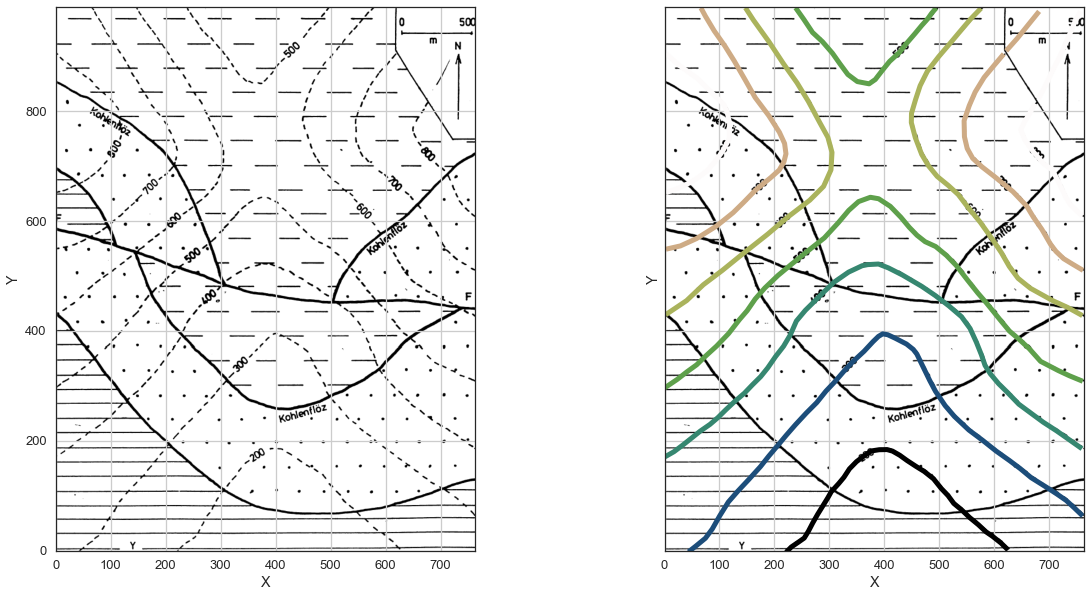

In [8]:
extent = gpd.read_file('../../data/extent.geojson')
extent = gg.utils.set_extent(gdf=extent, minz=100, maxz=900)

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5, cmap = 'gist_earth',
         aspect='equal')

# orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax2.set_ylim(extent[2],extent[3])
ax2.set_xlim(extent[0],extent[1]);

## Interpolate Topography

In [9]:
dem = gg.vector.interpolate_raster(topo, method='rbf')
dem

array([[335.94385892, 335.10203526, 334.25984406, ..., 292.96922394,
        293.76010102, 294.55395647],
       [336.09252324, 335.25157714, 334.41028464, ..., 292.94574563,
        293.73674151, 294.53077309],
       [336.24837125, 335.40847115, 334.5682545 , ..., 292.92538677,
        293.71648035, 294.51066913],
       ...,
       [762.96146177, 762.15810352, 761.35079808, ..., 799.86714078,
        800.73958708, 801.59583551],
       [762.62983672, 761.82442125, 761.0150659 , ..., 799.39857372,
        800.27936718, 801.1443121 ],
       [762.30262041, 761.49519723, 760.68384212, ..., 798.93369054,
        799.82184818, 800.69465557]])

In [10]:
np.save('../dem.npy',dem)

In [11]:
dem = np.load('../dem.npy')

In [12]:
type(dem)

numpy.ndarray

In [13]:
dem.shape

(991, 761)

## Plot Topography

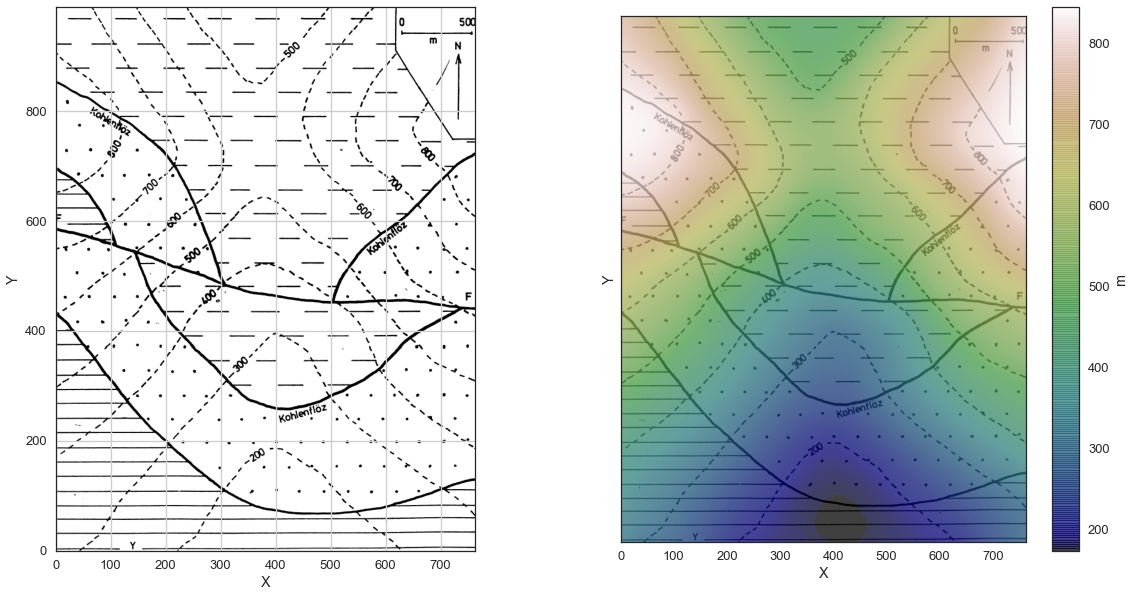

In [14]:
extent = gpd.read_file('../../data/extent.geojson')
extent = gg.utils.set_extent(gdf=extent, minz=100, maxz=900)

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
im = plt.imshow(dem,origin = 'lower', alpha=0.75, cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('m')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(extent[2],extent[3])
ax2.set_xlim(extent[0],extent[1]);


## Save Topography as Raster

In [15]:
gg.raster.save_as_tiff('../topo.tif', dem, crs='epsg:4326', extent=[0,765,0,1000])

CRSError: The WKT could not be parsed. OGR Error code 6

In [30]:
%debug

> c:\users\legui\gempy_workshops\notebooks\solved\rasterio\_crs.pyx(367)rasterio._crs._CRS.from_user_input()

ipdb> help(_CRS.from_user_input)
*** No help for '(_CRS.from_user_input)'
ipdb> exit()


In [31]:
rasterio.crs.CRS.from_epsg(4326)

CRSError: The EPSG code is unknown. PROJ: proj_create_from_database: Cannot find proj.db

In [16]:
import rasterio
rasterio.__version__
"+init=epsg:26915"

'1.1.0'

In [17]:
import geopandas
geopandas.__version__

'0.8.1'

In [16]:
gg.raster.save_as_tiff??

## Digitize and Load Layer Boundaries

In [19]:
interfaces = gpd.read_file('../../data/interfaces.geojson')
interfaces.head()

,id,formation,geometry
0,None,Fault1,"MULTILINESTRING ((1.313 584.319, 27.510 577.88..."
1,None,Layer2,"MULTILINESTRING ((1.470 694.127, 20.294 683.14..."
2,None,Layer1,"MULTILINESTRING ((2.098 852.251, 27.824 837.50..."
3,None,Layer1,"MULTILINESTRING ((503.765 456.000, 510.353 477..."
4,None,Layer1,"MULTILINESTRING ((145.162 538.513, 160.535 498..."


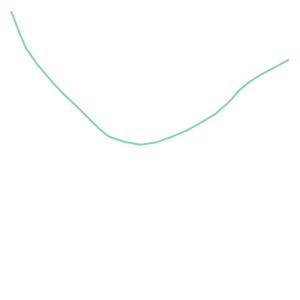

In [20]:
interfaces.loc[4]['geometry']

## Extract coordinates

In [21]:
interfaces_coords = gg.vector.extract_coordinates(interfaces,np.flipud(dem), extent=extent)
interfaces_coords.head()

id formation                                           geometry  \
0 0  None    Fault1  LINESTRING (1.313 584.319, 27.510 577.887, 51....   
  0  None    Fault1  LINESTRING (1.313 584.319, 27.510 577.887, 51....   
  0  None    Fault1  LINESTRING (1.313 584.319, 27.510 577.887, 51....   
  0  None    Fault1  LINESTRING (1.313 584.319, 27.510 577.887, 51....   
  0  None    Fault1  LINESTRING (1.313 584.319, 27.510 577.887, 51....   

                                      points           X           Y  \
0 0   (1.313299610144611, 584.3190758000997)    1.313300  584.319076   
  0   (27.510424697146597, 577.887446287722)   27.510425  577.887446   
  0  (51.511383609190325, 573.4951139378055)   51.511384  573.495114   
  0    (90.10116068345673, 560.318116888056)   90.101161  560.318117   
  0  (111.43534638305117, 554.8277014506605)  111.435346  554.827701   

              Z  
0 0  737.071161  
  0  722.145450  
  0  707.946652  
  0  665.860999  
  0  642.632977

## Plot Interfaces

In [22]:
extent = gpd.read_file('../../data/extent.geojson')
extent = gg.utils.set_extent(gdf=extent, minz=100, maxz=900)

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(extent[2],extent[3])
ax2.set_xlim(extent[0],extent[1]);


ValueError: 'box_aspect' and 'fig_aspect' must be positive

ValueError: 'box_aspect' and 'fig_aspect' must be positive

<Figure size 1440x720 with 2 Axes>

## Calculate Orientations

<img src="data/orientations.jpg" width="500">
<img src="data/task.png" width="300">

## Digitizing and Loading Fault Strike

In [23]:
strike_fault = gpd.read_file('../../data/strike_fault.geojson')
strike_fault

,id,Z,formation,geometry
0,1,400,Fault1,"MULTILINESTRING ((306.110 484.786, 511.198 451..."
1,2,500,Fault1,"MULTILINESTRING ((223.696 514.599, 583.462 453..."
2,3,600,Fault1,"MULTILINESTRING ((146.764 542.741, 740.718 440..."


In [24]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
strike_fault.plot(ax=ax2, column = 'formation', legend = False, linewidth = 5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);

ValueError: 'box_aspect' and 'fig_aspect' must be positive

ValueError: 'box_aspect' and 'fig_aspect' must be positive

<Figure size 1440x720 with 2 Axes>

Based on the strike lines and the calculated angles, we can conclude that the fault is dipping towards the south. Please take into account that the map was not digitized to scale. So angles are usually higher than expected for certain types of faults!

In [25]:
orientations_fault = gg.utils.calculate_orientations(strike_fault)
orientations_fault 

,X,Y,Z,dip,azimuth,polarity,formation
0,406.116264,476.192891,450.0,81.498734,189.495426,1,Fault1
1,423.660122,487.941779,550.0,81.938874,189.711081,1,Fault1


***What is the dip direction of fault?***

## Digitize and Load Interface Strike
For the strike of the different layers we have to distinguish between layer 1 and layer 2 and between the two fault blocks. 

In [27]:
strike_layers = gpd.read_file('../../data/strike_layers.geojson')
strike_layers

,id,Z,formation,geometry
0,1,300,Layer1,"MULTILINESTRING ((311.657 309.826, 497.763 279..."
1,2,400,Layer1,"MULTILINESTRING ((228.787 392.414, 586.856 331..."
2,3,500,Layer1,"MULTILINESTRING ((173.917 467.931, 644.272 386..."
3,4,600,Layer1,"MULTILINESTRING ((147.613 542.600, 740.436 440..."
4,1,200,Layer2,"MULTILINESTRING ((306.708 109.579, 546.835 69...."
5,2,300,Layer2,"MULTILINESTRING ((205.736 192.450, 205.736 192..."
6,3,400,Layer2,"MULTILINESTRING ((128.522 273.623, 763.204 175..."
7,4,500,Layer2,"MULTILINESTRING ((69.126 348.292, 760.941 241...."
8,5,600,Layer2,"MULTILINESTRING ((2.943 428.617, 2.943 428.617..."
9,5,500,Layer1,"MULTILINESTRING ((280.687 560.701, 532.976 517..."


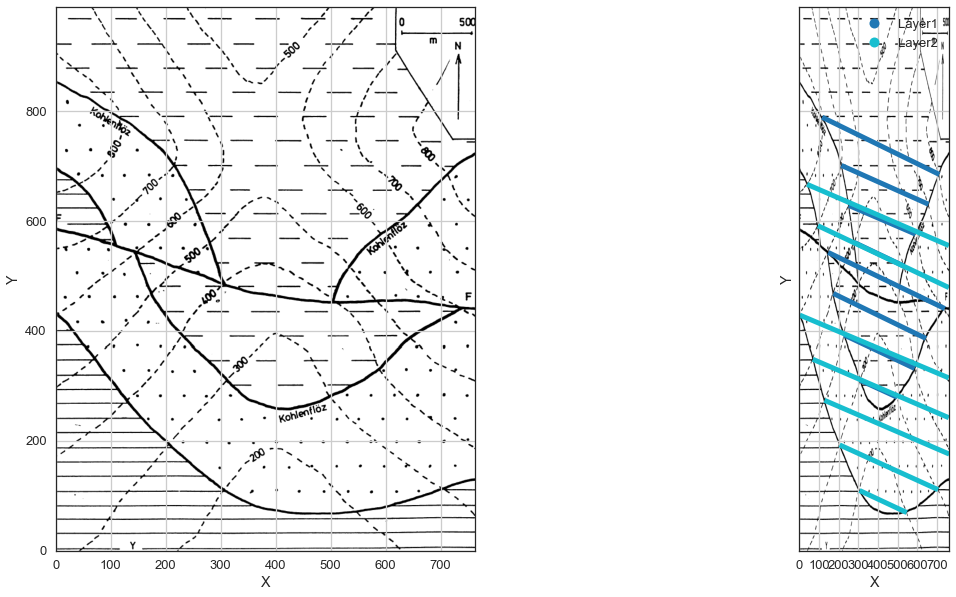

In [28]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
strike_layers.plot(ax=ax2, column = 'formation', legend = True, linewidth = 5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);

## Separate Layers

In [29]:
gdf1 = strike_layers[strike_layers['formation'] == 'Layer1']
gdf2 = strike_layers[strike_layers['formation'] == 'Layer2']
gdf1_south = gdf1[gdf1['id']<= 4]
gdf1_north = gdf1[gdf1['id']> 4]
gdf2_south = gdf2[gdf2['id']<= 5]
gdf2_north = gdf2[gdf2['id']> 5]

## Calculate Orientations

In [30]:
orientations1_south = gg.utils.calculate_orientations(gdf1_south)
orientations1_north = gg.utils.calculate_orientations(gdf1_north)
orientations2_south = gg.utils.calculate_orientations(gdf2_south)
orientations2_north = gg.utils.calculate_orientations(gdf2_north)
orientations2_north

,X,Y,Z,dip,azimuth,polarity,formation
0,414.609395,572.863052,750.0,54.784035,189.154487,1,Layer2


## Merge DataFrames

In [31]:
orientations_coords = pd.concat([orientations_fault, orientations1_south, orientations1_north, orientations2_south, orientations2_north]).reset_index()
orientations_coords

,index,X,Y,Z,dip,azimuth,polarity,formation
0,0,406.116264,476.192891,450.000000,81.498734,189.495426,1,Fault1
1,1,423.660122,487.941779,550.000000,81.938874,189.711081,1,Fault1
2,0,406.265757,328.281300,350.000000,56.163477,189.570970,1,Layer1
3,1,408.457730,394.535449,450.000000,57.248407,189.777815,1,Layer1
4,2,426.559183,459.304713,550.000000,55.203043,189.805652,1,Layer1
5,0,414.467978,570.600370,550.000000,57.203244,189.077735,1,Layer1
6,1,429.033991,633.814040,650.000000,56.966206,188.951028,1,Layer1
7,2,425.215716,701.128821,750.000000,56.388040,189.612656,1,Layer1
8,0,483.439365,128.124880,271.428571,56.516928,189.263941,1,Layer2
9,1,488.894044,166.752090,328.571429,54.755503,189.050624,1,Layer2


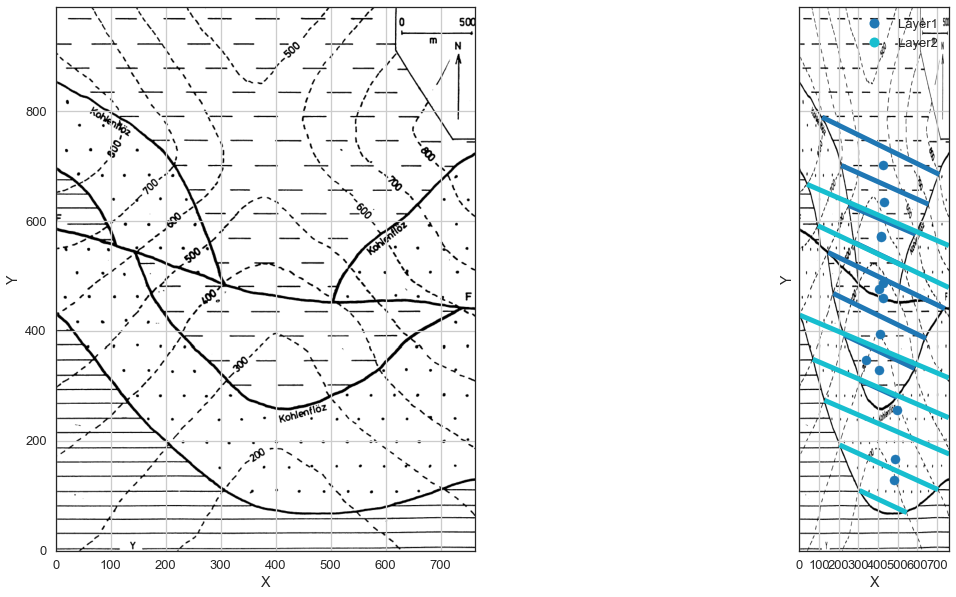

In [32]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
ax2.scatter(orientations_coords['X'], orientations_coords['Y'])
strike_layers.plot(ax=ax2, column = 'formation', legend = True, linewidth = 5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);

***What direction are the layers dipping?***
***Which one is the oldest? Which one is the youngest?***

# Let us combine everything - Creating a GemPy Data Class

In [33]:
geo_data = gg.GemPyData(model_name='GeoUtrecht', 
                        crs='EPSG:4326')

In [34]:
vars(geo_data)

{'model_name': 'GeoUtrecht',
 'crs': 'EPSG:4326',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'faults': None,
 'is_fault': None}

## Set Extent

In [35]:
extent = gpd.read_file('../../data/extent.geojson')
geo_data.set_extent(gdf=extent, minz=100, maxz=900)
geo_data.extent

[0.0, 763.0, 0.0, 989.0, 100, 900]

## Set Resolution

In [36]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

## Set Interfaces

In [37]:
geo_data.to_gempy_df(interfaces_coords.sample(n=85), 'interfaces')
geo_data.interfaces

,level_0,level_1,X,Y,Z,formation
0,0,0,685.889670,448.941118,581.941401,Fault1
1,0,0,422.663467,458.823866,354.409077,Fault1
2,0,0,296.070174,488.472109,408.026520,Fault1
3,4,0,730.597339,436.234728,590.625678,Layer1
4,3,0,645.574334,618.516521,679.777338,Layer1
...,...,...,...,...,...,...
80,2,0,2.097645,852.251349,824.329690,Layer1
81,5,0,253.244934,150.105649,243.857716,Layer2
82,5,0,200.850684,196.225139,304.983349,Layer2
83,0,0,90.101161,560.318117,665.860999,Fault1


In [38]:
geo_data.orientations = orientations_coords
geo_data.orientations

,index,X,Y,Z,dip,azimuth,polarity,formation
0,0,406.116264,476.192891,450.000000,81.498734,189.495426,1,Fault1
1,1,423.660122,487.941779,550.000000,81.938874,189.711081,1,Fault1
2,0,406.265757,328.281300,350.000000,56.163477,189.570970,1,Layer1
3,1,408.457730,394.535449,450.000000,57.248407,189.777815,1,Layer1
4,2,426.559183,459.304713,550.000000,55.203043,189.805652,1,Layer1
5,0,414.467978,570.600370,550.000000,57.203244,189.077735,1,Layer1
6,1,429.033991,633.814040,650.000000,56.966206,188.951028,1,Layer1
7,2,425.215716,701.128821,750.000000,56.388040,189.612656,1,Layer1
8,0,483.439365,128.124880,271.428571,56.516928,189.263941,1,Layer2
9,1,488.894044,166.752090,328.571429,54.755503,189.050624,1,Layer2


## Add Section Dict

In [39]:
custom_section = gpd.read_file('../../data/customsection.geojson')
geo_data.to_section_dict(custom_section, 'section')
geo_data.section_dict

{'Section1': ([139.83498503826536, 0.0],
  [138.42080896823512, 989.0],
  [100, 80])}

## Add Surface Colors

In [41]:
geo_data.to_surface_color_dict('../../data/style.qml')
geo_data.surface_colors

{'basement': '#525252', 'Layer1': '#b35a2a', 'Layer2': '#069a2b'}

## Add Stack

In [42]:
geo_data.stack = {  "Fault1": ('Fault1'),
                    "Strat_Series": ('Layer2', 'Layer1'),
                    "basement": ('basement')}
geo_data.stack

{'Fault1': 'Fault1',
 'Strat_Series': ('Layer2', 'Layer1'),
 'basement': 'basement'}

## Add DEM

In [43]:
geo_data.dem = '../topo.tif'
geo_data.dem

'../topo.tif'

# Visualize Data Set

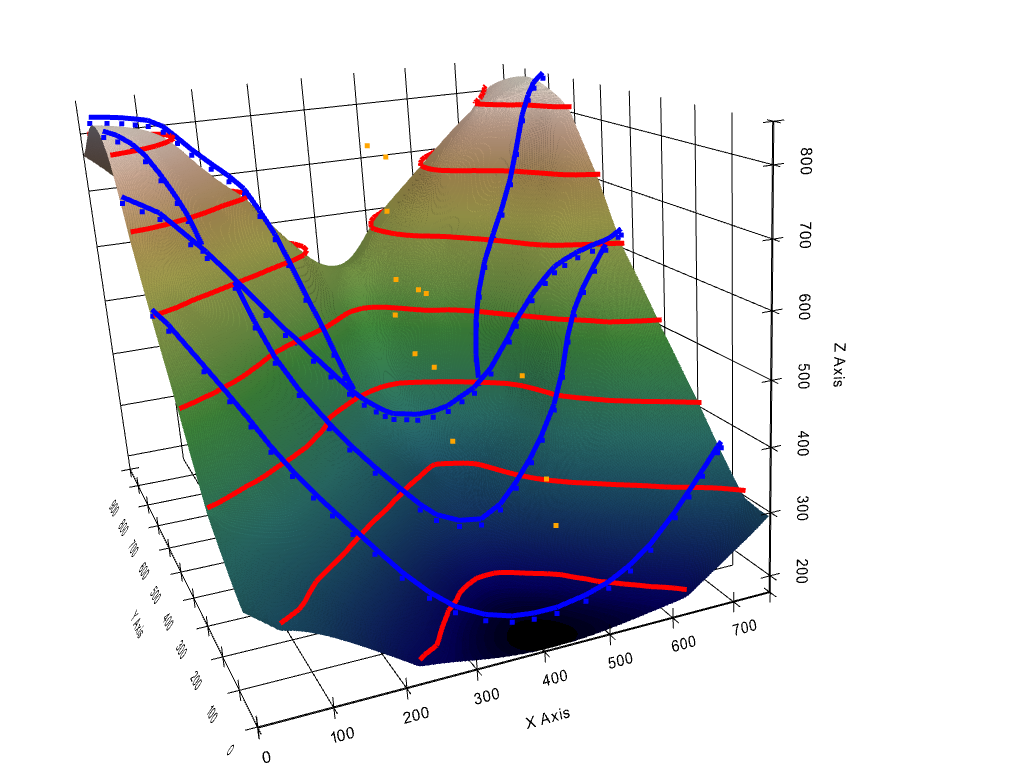

In [44]:
import pyvista as pv
p = pv.Plotter(notebook =True)
gg.visualization.plot_dem_3d(dem, p, cmap = 'gist_earth')
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 10)
gg.visualization.plot_points_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_points_3d(orientations_coords, p, color = 'orange', add_to_z = 20)
gg.visualization.plot_contours_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()

# Create GemPy Model

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [45]:
import sys  
import gempy as gp
print(gp)
print(gp.__version__)

<module 'gempy' from 'C:\\Users\\legui\\miniconda3\\envs\\gu\\lib\\site-packages\\gempy\\__init__.py'>
2.2.6


## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [46]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

GeoUtrecht  2020-08-20 11:19

In [47]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


GeoUtrecht  2020-08-20 11:19

In [48]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Fault1,Default series,1,#015482,1
1,Layer1,Default series,2,#9f0052,2
2,Layer2,Default series,3,#ffbe00,3


In [49]:
geo_data.stack

{'Fault1': 'Fault1',
 'Strat_Series': ('Layer2', 'Layer1'),
 'basement': 'basement'}

In [50]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

,surface,series,order_surfaces,color,id
0,Fault1,Fault1,1,#015482,1
1,Layer1,Strat_Series,1,#9f0052,2
2,Layer2,Strat_Series,2,#ffbe00,3
3,basement,Strat_Series,3,#728f02,4


In [51]:
geo_model.surfaces.colors.change_colors(geo_data.surface_colors)

C:\Users\legui\miniconda3\envs\gu\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


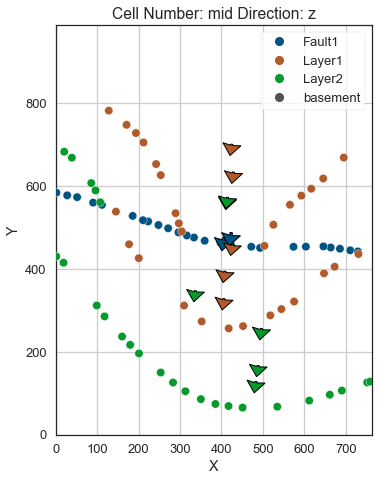

In [52]:
gp.plot_2d(geo_model, direction = 'z')
plt.grid()

A raster created with ArcGIS has to be loaded as the import of the created raster fails. This is due to a bug in `GemPy`described here: https://github.com/cgre-aachen/gempy/issues/492

In [53]:
geo_model.set_topography(
    source='gdal', filepath=geo_data.dem)

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  7.63      ,   9.89      , 108.        ],
       [  7.63      ,   9.89      , 124.        ],
       [  7.63      ,   9.89      , 140.        ],
       ...,
       [762.49603699, 986.47961264,   0.        ],
       [762.49603699, 987.48776758,   0.        ],
       [762.49603699, 988.49592253,   0.        ]])

In [54]:
geo_model.set_section_grid(geo_data.section_dict)

Active grids: ['regular' 'topography' 'sections']


,start,stop,resolution,dist
Section1,"[139.83498503826536, 0.0]","[138.42080896823512, 989.0]","[100, 80]",989.001011


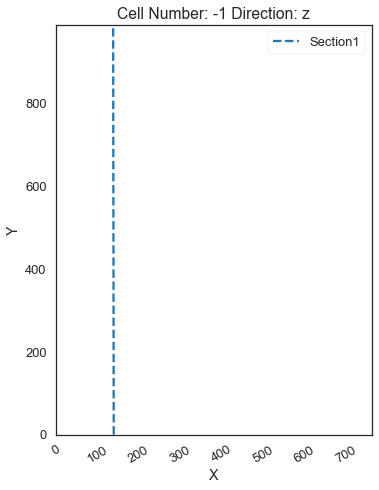

In [55]:
gp.plot.plot_section_traces(geo_model)

In [56]:
geo_model.set_is_fault(['Fault1'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault1,1,Fault,True,True,False
Strat_Series,2,Erosion,True,False,False


In [57]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...


C:\Users\legui\miniconda3\envs\gu\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\legui\miniconda3\envs\gu\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\legui\miniconda3\envs\gu\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                   values
range            1483.34
$C_o$            52387.9
drift equations   [3, 3]


In [58]:
sol = gp.compute_model(geo_model)
sol

C:\Users\legui\miniconda3\envs\gu\lib\site-packages\gempy\core\solution.py:317: UserWarning: Surfaces not computed due to: No surface found at the given iso value.. The surface is: Series: No surface found at the given iso value.; Surface Number:0
  '; Surface Number:' + str(s_n))
C:\Users\legui\miniconda3\envs\gu\lib\site-packages\gempy\core\solution.py:317: UserWarning: Surfaces not computed due to: No surface found at the given iso value.. The surface is: Series: No surface found at the given iso value.; Surface Number:1
  '; Surface Number:' + str(s_n))
C:\Users\legui\miniconda3\envs\gu\lib\site-packages\gempy\core\solution.py:317: UserWarning: Surfaces not computed due to: No surface found at the given iso value.. The surface is: Series: No surface found at the given iso value.; Surface Number:2
  '; Surface Number:' + str(s_n))
C:\Users\legui\miniconda3\envs\gu\lib\site-packages\gempy\core\solution.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequence


Lithology ids 
  [2. 2. 2. ... 4. 4. 4.] 

In [59]:
geo_model.surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
0,Fault1,Fault1,1,False,True,True,True,#527682,NaN,NaN,-0.698348,1
2,Layer2,Strat_Series,1,False,False,True,True,#069a2b,NaN,NaN,-0.0356301,2
1,Layer1,Strat_Series,2,False,False,True,True,#b35a2a,NaN,NaN,-0.168974,3
3,basement,Strat_Series,3,True,False,True,True,#525252,NaN,NaN,NaN,4


The geological map had to be created manually as there seems to be a bug when creating the geological map with `GemGIS`. This was reported already: https://github.com/cgre-aachen/gempy/issues/446

ValueError: cannot reshape array of size 742617 into shape (50,50)

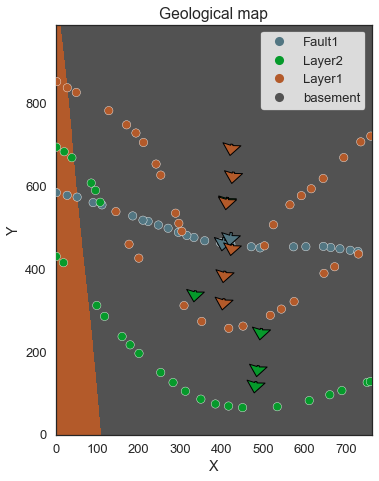

In [60]:
gp.plot_2d(geo_model, section_names=['topography'], show_contours=False)

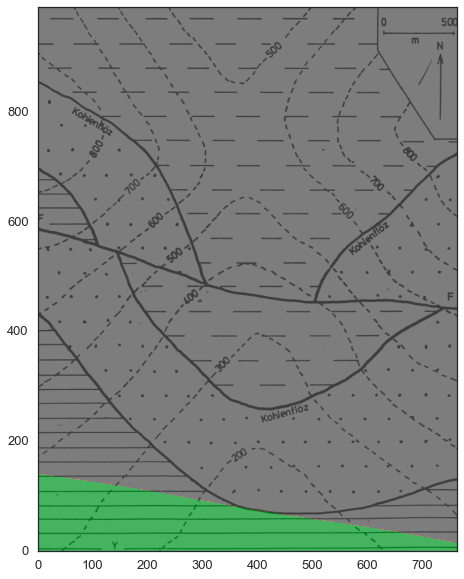

In [61]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#069a2b', '#b35a2a','#525252', ]
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
gmap = np.rot90(geolmap,1)
plt.imshow(gmap, extent=geo_data.extent[:4], alpha=0.75, cmap=ListedColormap(cols))

C:\Users\legui\miniconda3\envs\gu\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


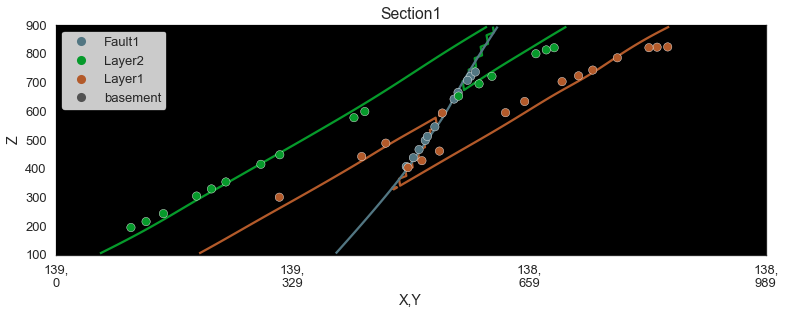

In [62]:
gp.plot_2d(geo_model, section_names=['Section1'], show_topography=True, ve = 0.4)

C:\Users\legui\miniconda3\envs\gu\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


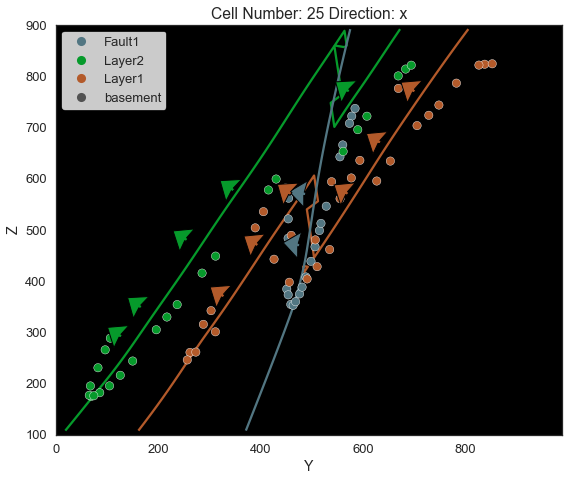

In [63]:
gp.plot_2d(geo_model, direction='x', show_topography=True, cell_number=25, ve=0.4)

C:\Users\legui\miniconda3\envs\gu\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


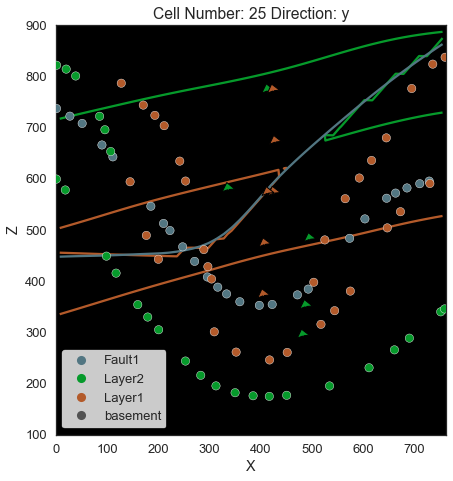

In [64]:
gp.plot_2d(geo_model, direction='y', show_topography=True, cell_number = 25)

In [66]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=False,
                 plotter_type='basic', notebook=True, ve = 0.4)

ValueError: Empty meshes cannot be plotted. Input mesh has zero points.

# Postprocessing - Converting Geological Map to Shape Files

## Create GeoDataFrame with Polygons

In [ ]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

## Plot Polygons

In [ ]:
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9)
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [ ]:
gdf.to_file('../liths.shp')

## Save Polygons as GeoTiff

Rasters like DEMs can be saved as georeferenced tif-files. The same can be done with the geological map obtained from `GemPy` by saving the array of the geological map as tif. 

In [ ]:
gg.raster.save_as_tiff('../geolmap.tif',gmap, extent=geo_data.extent, crs='EPSG:4326')

# Create borehole from Geo_Model

Geological models are used to extract information from the subsurface. As geologists, we like to look of the result of the model at a single location and down to the maximum z extent in depth. This is termed a borehole or in the case of fluid extraction a well. These boreholes can easily be extracted and displayed using GemGIS. All you need is the `geo_model` object, the `geo_data` object and the location of your borehole, optionally with its maximum depth. 

In [ ]:
sol = gg.post.extract_borehole(geo_model, geo_data, [250,500])
sol

# Depth Maps

Depth maps indicate the depth of a surface within the model extent. By applying an intuitive color coding, the spatial position of the respective surface can easily be interpreted. Depth maps can easily be created by executing `gg.visualization.plot_depth_map(...)`. All that is needed is the `geo_model` object and the name of the surface to be plotted. Optionally, a range for the colorbar can be provided to make the maps of different surfaces comparable. Otherwise, the min and max values of each surface are taken for the limits of the color bar. By setting `notebook` to `False` an interactive PyVista Window is opened (press 'Q' to close window safely again).

## Depth Map Layer1

In [ ]:
gg.visualization.plot_depth_map(geo_model, 'Layer1', clim=[100, 900], notebook=True)

## Depth Map Layer2

In [ ]:
gg.visualization.plot_depth_map(geo_model, 'Layer2', clim=[100, 900], notebook=True)